
# Insurance database



Using MySQL commands and Python to import a database from the workbench to a Pandas df. An insurance's database is analyzed.


In [1]:
import mysql.connector
from mysql.connector import Error
from sqlalchemy import create_engine
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


## Connecting to MySQL and defining some functions


In [2]:
#Se crea la conexion
def create_server_connection(host_name, user_name, user_password): 
    try: 
        connection = mysql.connector.connect(
            host = host_name,
            user = user_name,
            passwd = user_password
        )
        print("MySQL Database connection succesful")
    except Error as err:
        print(f"Error: '{err}'")
    return connection

pw = "root" #Put our MySQL Terminal password
connection = create_server_connection("localhost", "root", pw) 

#Se crea la base de datos
def create_database(connection, query):
    cursor = connection.cursor() #to make statements to communicate with mysql database
    try:
        cursor.execute(query)
        print('Database created successufully')
    except Error as err:
        print(f"Error: '{err}'")

db = 'aseguradora_db' #nombre de la base de datos a la cual conectar

#Se conecta a la base de datos creada

def create_db_connection(host_name, user_name, user_password, db_name):
    connection = None
    try: 
        connection = mysql.connector.connect(
            host = host_name,
            user = user_name,
            passwd = user_password,
            database = db_name)
        print('MySQL database connection successful')
    except Error as err:
        print(f"Error: '{err}'")
    return connection

MySQL Database connection succesful


In [3]:
#Definiendo las funciones para ejecutar y leer queries

def execute_query(connection, query):
    cursor = connection.cursor()
    try:
        cursor.execute(query)
        connection.commit()
        print('Query was successful')
    except Error as err:
        print(f"Error: '{err}'")

def read_query(connection, query):
    cursor = connection.cursor()
    result = None
    try:
        cursor.execute(query)
        result = cursor.fetchall() #will return all results in table
        return result
    except Error as err:
        print(f"Error: '{err}'")

In [ ]:
view_users = """
SELECT * FROM users;
"""

connection = create_db_connection("localhost", "root", pw, db)
results = read_query(connection, view_users)
for result in results:
    print(result)


### Joining the four tables as a view for visualization



***The database from MySQL  is imported to a pandas dataframe***


In [5]:
view_insurance_table = """
CREATE OR REPLACE VIEW insurance_table AS
SELECT plan_subs.plan_id, plan_subs.user_id, users.gender, users.date_of_birth, plan_subs.subscription_date,
       TIMESTAMPDIFF(YEAR, users.date_of_birth,plan_subs.subscription_date) AS plan_age,
       plan_prices.annual_price_of_plan, claim_report_date, claims_reports.claim_amount
FROM users, plan_prices, plan_subs LEFT OUTER JOIN claims_reports
ON plan_subs.plan_id = claims_reports.plan_id 
WHERE plan_subs.user_id = users.user_id 
AND plan_prices.age = TIMESTAMPDIFF(YEAR, users.date_of_birth, plan_subs.subscription_date)
AND plan_prices.gender = users.gender
ORDER BY plan_subs.plan_id;
"""

connection = create_db_connection("localhost", "root", pw, db)
execute_query(connection, view_insurance_table) 

MySQL database connection successful
Query was successful


In [11]:
view_insurance_table_2 = """
CREATE OR REPLACE VIEW insurance_table_2 AS
SELECT plan_subs.plan_id, plan_subs.user_id, users.gender, users.date_of_birth, 
       plan_subs.subscription_date,
	   TIMESTAMPDIFF(YEAR, users.date_of_birth,plan_subs.subscription_date) AS plan_age,
       CASE WHEN TIMESTAMPDIFF(YEAR, users.date_of_birth,plan_subs.subscription_date) BETWEEN 20 AND 24 THEN '20-24'
			WHEN TIMESTAMPDIFF(YEAR, users.date_of_birth,plan_subs.subscription_date) BETWEEN 25 AND 29 THEN '25-29'
            WHEN TIMESTAMPDIFF(YEAR, users.date_of_birth,plan_subs.subscription_date) BETWEEN 30 AND 34 THEN '30-34'
            WHEN TIMESTAMPDIFF(YEAR, users.date_of_birth,plan_subs.subscription_date) BETWEEN 35 AND 39 THEN '35-39'
            WHEN TIMESTAMPDIFF(YEAR, users.date_of_birth,plan_subs.subscription_date) BETWEEN 40 AND 44 THEN '40-44'
            WHEN TIMESTAMPDIFF(YEAR, users.date_of_birth,plan_subs.subscription_date) BETWEEN 45 AND 49 THEN '45-49'
            WHEN TIMESTAMPDIFF(YEAR, users.date_of_birth,plan_subs.subscription_date) BETWEEN 50 AND 54 THEN '50-54'
            WHEN TIMESTAMPDIFF(YEAR, users.date_of_birth,plan_subs.subscription_date) BETWEEN 55 AND 59 THEN '55-59'
            WHEN TIMESTAMPDIFF(YEAR, users.date_of_birth,plan_subs.subscription_date) BETWEEN 60 AND 64 THEN '60-64'
            END AS age_group,
	   plan_prices.annual_price_of_plan, claim_report_date, claims_reports.claim_amount,
       (claim_amount/annual_price_of_plan) AS claim_plan
FROM users, plan_prices, plan_subs LEFT OUTER JOIN claims_reports
ON plan_subs.plan_id = claims_reports.plan_id 
WHERE plan_subs.user_id = users.user_id 
AND plan_prices.age = TIMESTAMPDIFF(YEAR, users.date_of_birth, plan_subs.subscription_date)
AND plan_prices.gender = users.gender
ORDER BY plan_subs.plan_id;
"""

connection = create_db_connection("localhost", "root", pw, db)
execute_query(connection, view_insurance_table_2) 

read_insurance_table_2 = """
SELECT * FROM insurance_table_2;
"""

connection = create_db_connection("localhost", "root", pw, db)
results = read_query(connection, read_insurance_table_2)
    
#Create a pandas dataframe from the view

from_db = [] #creating an empty list

for result in results:
    result = list(result)
    from_db.append(result) #appending the results to the empty list

columns = ['Plan_id', 'User_id', 'Gender', 'Date_of_birth', 'Subscription_date',
           'Plan_age', 'Age_group', 'Annual_price_of_plan', 
           'Claim_report_date', 'Claim_amount', 'Claim/plan']    
insurance_table_2_df = pd.DataFrame(from_db, columns = columns)

insurance_table_2_df

MySQL database connection successful
Query was successful
MySQL database connection successful


,Plan_id,User_id,Gender,Date_of_birth,Subscription_date,Plan_age,Age_group,Annual_price_of_plan,Claim_report_date,Claim_amount,Claim/plan
0,1,1,M,1992-01-03,2020-10-25,28,25-29,10395.0,2021-07-01,3993.88,0.384212
1,1,1,M,1992-01-03,2020-10-25,28,25-29,10395.0,2021-06-02,4070.91,0.391622
2,1,1,M,1992-01-03,2020-10-25,28,25-29,10395.0,2021-01-24,3955.23,0.380494
3,2,2,F,1988-01-28,2020-09-25,32,30-34,12600.0,None,NaN,NaN
4,3,3,M,1989-10-28,2020-08-07,30,30-34,11550.0,2021-01-16,4448.66,0.385165
...,...,...,...,...,...,...,...,...,...,...,...
62582,28401,9996,F,1994-05-01,2022-02-08,27,25-29,8925.0,2022-12-12,3406.06,0.381631
62583,28402,9997,F,1985-04-15,2022-04-23,37,35-39,18375.0,None,NaN,NaN
62584,28403,9998,F,1993-04-12,2022-12-13,29,25-29,9975.0,2023-10-08,3915.32,0.392513
62585,28404,9999,F,1989-09-27,2022-08-24,32,30-34,12600.0,2023-04-12,4935.97,0.391744



## Summarizing database info


In [6]:
view_insurance_results_4col = """
CREATE OR REPLACE VIEW insurance_results_4col AS
SELECT '20-24' AS Age_group, 'M' AS Gender,
	ROUND(AVG(annual_price_of_plan), 2) AS Avg_annual_price_of_plan,
    ROUND(AVG(claim_amount), 2) AS Avg_claim_amount
FROM insurance_table WHERE ((plan_age BETWEEN 20 AND 24) AND gender = 'M')
UNION SELECT '25-29', 'M', ROUND(AVG(annual_price_of_plan), 2), ROUND(AVG(claim_amount), 2)
	FROM insurance_table WHERE ((plan_age BETWEEN 25 AND 29) AND gender = 'M')
UNION SELECT '30-34', 'M', ROUND(AVG(annual_price_of_plan), 2), ROUND(AVG(claim_amount), 2)
	FROM insurance_table WHERE ((plan_age BETWEEN 30 AND 34) AND gender = 'M')
UNION SELECT '35-39', 'M', ROUND(AVG(annual_price_of_plan), 2), ROUND(AVG(claim_amount), 2)
	FROM insurance_table WHERE ((plan_age BETWEEN 35 AND 39) AND gender = 'M')
UNION SELECT '40-44', 'M', ROUND(AVG(annual_price_of_plan), 2), ROUND(AVG(claim_amount), 2)
	FROM insurance_table WHERE ((plan_age BETWEEN 40 AND 44) AND gender = 'M')
UNION SELECT '45-49', 'M', ROUND(AVG(annual_price_of_plan), 2), ROUND(AVG(claim_amount), 2)
	FROM insurance_table WHERE ((plan_age BETWEEN 45 AND 49) AND gender = 'M')
UNION SELECT '50-54', 'M', ROUND(AVG(annual_price_of_plan), 2), ROUND(AVG(claim_amount), 2)
	FROM insurance_table WHERE ((plan_age BETWEEN 50 AND 54) AND gender = 'M')
UNION SELECT '55-59', 'M', ROUND(AVG(annual_price_of_plan), 2), ROUND(AVG(claim_amount), 2)
	FROM insurance_table WHERE ((plan_age BETWEEN 55 AND 59) AND gender = 'M')
UNION SELECT '60-64', 'M', ROUND(AVG(annual_price_of_plan), 2), ROUND(AVG(claim_amount), 2)
	FROM insurance_table WHERE ((plan_age BETWEEN 60 AND 64) AND gender = 'M')
UNION SELECT '20-24', 'F', ROUND(AVG(annual_price_of_plan), 2), ROUND(AVG(claim_amount), 2)
	FROM insurance_table WHERE ((plan_age BETWEEN 20 AND 24) AND gender = 'F')
UNION SELECT '25-29', 'F', ROUND(AVG(annual_price_of_plan), 2), ROUND(AVG(claim_amount), 2)
	FROM insurance_table WHERE ((plan_age BETWEEN 25 AND 29) AND gender = 'F')
UNION SELECT '30-34', 'F', ROUND(AVG(annual_price_of_plan), 2), ROUND(AVG(claim_amount), 2)
	FROM insurance_table WHERE ((plan_age BETWEEN 30 AND 34) AND gender = 'F')
UNION SELECT '35-39', 'F', ROUND(AVG(annual_price_of_plan), 2), ROUND(AVG(claim_amount), 2)
	FROM insurance_table WHERE ((plan_age BETWEEN 35 AND 39) AND gender = 'F')
UNION SELECT '40-44', 'F', ROUND(AVG(annual_price_of_plan), 2), ROUND(AVG(claim_amount), 2)
	FROM insurance_table WHERE ((plan_age BETWEEN 40 AND 44) AND gender = 'F')
UNION SELECT '45-49', 'F', ROUND(AVG(annual_price_of_plan), 2), ROUND(AVG(claim_amount), 2)
	FROM insurance_table WHERE ((plan_age BETWEEN 45 AND 49) AND gender = 'F')
UNION SELECT '50-54', 'F', ROUND(AVG(annual_price_of_plan), 2), ROUND(AVG(claim_amount), 2)
	FROM insurance_table WHERE ((plan_age BETWEEN 50 AND 54) AND gender = 'F')
UNION SELECT '55-59', 'F', ROUND(AVG(annual_price_of_plan), 2), ROUND(AVG(claim_amount), 2)
	FROM insurance_table WHERE ((plan_age BETWEEN 55 AND 59) AND gender = 'F')
UNION SELECT '60-64', 'F', ROUND(AVG(annual_price_of_plan), 2), ROUND(AVG(claim_amount), 2)
	FROM insurance_table WHERE ((plan_age BETWEEN 60 AND 64) AND gender = 'F');
"""

connection = create_db_connection("localhost", "root", pw, db)
execute_query(connection, view_insurance_results_4col) 

MySQL database connection successful
Query was successful


In [7]:
read_insurance_r4col = """
SELECT * FROM insurance_results_4col;
"""

connection = create_db_connection("localhost", "root", pw, db)
results = read_query(connection, read_insurance_r4col)
for result in results:
    print(result)

MySQL database connection successful
('20-24', 'M', 6615.0, 2552.78)
('25-29', 'M', 9512.29, 3672.7)
('30-34', 'M', 13946.09, 5390.15)
('35-39', 'M', 18597.55, 7173.72)
('40-44', 'M', 30009.01, 11565.96)
('45-49', 'M', 41681.31, 16076.83)
('50-54', 'M', 54507.05, 21037.6)
('55-59', 'M', 72970.16, 28213.0)
('60-64', 'M', 86637.76, 33452.1)
('20-24', 'F', 7350.0, 2838.84)
('25-29', 'F', 8942.17, 3455.61)
('30-34', 'F', 12612.56, 4868.82)
('35-39', 'F', 17129.54, 6618.98)
('40-44', 'F', 27122.27, 10472.95)
('45-49', 'F', 37645.13, 14532.86)
('50-54', 'F', 49851.95, 19220.63)
('55-59', 'F', 66041.23, 25541.59)
('60-64', 'F', 79137.35, 30561.27)


In [8]:
#Create a pandas dataframe from the view

from_db = [] #creating an empty list

for result in results:
    result = list(result)
    from_db.append(result) #appending the results to the empty list

columns = ['Age_group', 'Gender', 'Avg_annual_price_of_plan', 'Avg_claim_amount']    
insurance_results_4col_df = pd.DataFrame(from_db, columns = columns)

insurance_results_4col_df

,Age_group,Gender,Avg_annual_price_of_plan,Avg_claim_amount
0,20-24,M,6615.00,2552.78
1,25-29,M,9512.29,3672.70
2,30-34,M,13946.09,5390.15
3,35-39,M,18597.55,7173.72
4,40-44,M,30009.01,11565.96
5,45-49,M,41681.31,16076.83
6,50-54,M,54507.05,21037.60
7,55-59,M,72970.16,28213.00
8,60-64,M,86637.76,33452.10
9,20-24,F,7350.00,2838.84


In [9]:
view_insurance_results_6col = """
CREATE OR REPLACE VIEW insurance_results_6col AS
SELECT '20-24' AS Age_group, 'M' AS Gender,
	ROUND(AVG(annual_price_of_plan), 2) AS Avg_annual_price_of_plan,
    ROUND(AVG(claim_amount), 2) AS Avg_claim_amount,
	COUNT(plan_id) AS Plans_group,
    COUNT(claim_amount) AS Claims_group
FROM insurance_table WHERE ((plan_age BETWEEN 20 AND 24) AND gender = 'M')
UNION SELECT '25-29', 'M', ROUND(AVG(annual_price_of_plan), 2), ROUND(AVG(claim_amount), 2),
	COUNT(plan_id), COUNT(claim_amount)
	FROM insurance_table WHERE ((plan_age BETWEEN 25 AND 29) AND gender = 'M')
UNION SELECT '30-34', 'M', ROUND(AVG(annual_price_of_plan), 2), ROUND(AVG(claim_amount), 2),
	COUNT(plan_id), COUNT(claim_amount)
	FROM insurance_table WHERE ((plan_age BETWEEN 30 AND 34) AND gender = 'M')
UNION SELECT '35-39', 'M', ROUND(AVG(annual_price_of_plan), 2), ROUND(AVG(claim_amount), 2),
	COUNT(plan_id), COUNT(claim_amount)
	FROM insurance_table WHERE ((plan_age BETWEEN 35 AND 39) AND gender = 'M')
UNION SELECT '40-44', 'M', ROUND(AVG(annual_price_of_plan), 2), ROUND(AVG(claim_amount), 2),
	COUNT(plan_id), COUNT(claim_amount)
	FROM insurance_table WHERE ((plan_age BETWEEN 40 AND 44) AND gender = 'M')
UNION SELECT '45-49', 'M', ROUND(AVG(annual_price_of_plan), 2), ROUND(AVG(claim_amount), 2),
	COUNT(plan_id), COUNT(claim_amount)
	FROM insurance_table WHERE ((plan_age BETWEEN 45 AND 49) AND gender = 'M')
UNION SELECT '50-54', 'M', ROUND(AVG(annual_price_of_plan), 2), ROUND(AVG(claim_amount), 2),
	COUNT(plan_id), COUNT(claim_amount)
	FROM insurance_table WHERE ((plan_age BETWEEN 50 AND 54) AND gender = 'M')
UNION SELECT '55-59', 'M', ROUND(AVG(annual_price_of_plan), 2), ROUND(AVG(claim_amount), 2),
	COUNT(plan_id), COUNT(claim_amount)
	FROM insurance_table WHERE ((plan_age BETWEEN 55 AND 59) AND gender = 'M')
UNION SELECT '60-64', 'M', ROUND(AVG(annual_price_of_plan), 2), ROUND(AVG(claim_amount), 2),
	COUNT(plan_id), COUNT(claim_amount)
	FROM insurance_table WHERE ((plan_age BETWEEN 60 AND 64) AND gender = 'M')
UNION SELECT '20-24', 'F', ROUND(AVG(annual_price_of_plan), 2), ROUND(AVG(claim_amount), 2),
	COUNT(plan_id), COUNT(claim_amount)
	FROM insurance_table WHERE ((plan_age BETWEEN 20 AND 24) AND gender = 'F')
UNION SELECT '25-29', 'F', ROUND(AVG(annual_price_of_plan), 2), ROUND(AVG(claim_amount), 2),
	COUNT(plan_id), COUNT(claim_amount)
	FROM insurance_table WHERE ((plan_age BETWEEN 25 AND 29) AND gender = 'F')
UNION SELECT '30-34', 'F', ROUND(AVG(annual_price_of_plan), 2), ROUND(AVG(claim_amount), 2),
	COUNT(plan_id), COUNT(claim_amount)
	FROM insurance_table WHERE ((plan_age BETWEEN 30 AND 34) AND gender = 'F')
UNION SELECT '35-39', 'F', ROUND(AVG(annual_price_of_plan), 2), ROUND(AVG(claim_amount), 2),
	COUNT(plan_id), COUNT(claim_amount)
	FROM insurance_table WHERE ((plan_age BETWEEN 35 AND 39) AND gender = 'F')
UNION SELECT '40-44', 'F', ROUND(AVG(annual_price_of_plan), 2), ROUND(AVG(claim_amount), 2),
	COUNT(plan_id), COUNT(claim_amount)
	FROM insurance_table WHERE ((plan_age BETWEEN 40 AND 44) AND gender = 'F')
UNION SELECT '45-49', 'F', ROUND(AVG(annual_price_of_plan), 2), ROUND(AVG(claim_amount), 2),
	COUNT(plan_id), COUNT(claim_amount)
	FROM insurance_table WHERE ((plan_age BETWEEN 45 AND 49) AND gender = 'F')
UNION SELECT '50-54', 'F', ROUND(AVG(annual_price_of_plan), 2), ROUND(AVG(claim_amount), 2),
	COUNT(plan_id), COUNT(claim_amount)
	FROM insurance_table WHERE ((plan_age BETWEEN 50 AND 54) AND gender = 'F')
UNION SELECT '55-59', 'F', ROUND(AVG(annual_price_of_plan), 2), ROUND(AVG(claim_amount), 2),
	COUNT(plan_id), COUNT(claim_amount)
	FROM insurance_table WHERE ((plan_age BETWEEN 55 AND 59) AND gender = 'F')
UNION SELECT '60-64', 'F', ROUND(AVG(annual_price_of_plan), 2), ROUND(AVG(claim_amount), 2),
	COUNT(plan_id), COUNT(claim_amount)
	FROM insurance_table WHERE ((plan_age BETWEEN 60 AND 64) AND gender = 'F');
"""

connection = create_db_connection("localhost", "root", pw, db)
execute_query(connection, view_insurance_results_6col) 

MySQL database connection successful
Query was successful


In [13]:
read_insurance_r6col = """
SELECT * FROM insurance_results_6col;
"""

connection = create_db_connection("localhost", "root", pw, db)
results = read_query(connection, read_insurance_r6col)
for result in results:
    print(result)

MySQL database connection successful
('20-24', 'M', 6615.0, 2552.78, 5579, 5040)
('25-29', 'M', 9512.29, 3672.7, 8108, 7365)
('30-34', 'M', 13946.09, 5390.15, 8358, 7560)
('35-39', 'M', 18597.55, 7173.72, 3660, 3328)
('40-44', 'M', 30009.01, 11565.96, 1128, 1031)
('45-49', 'M', 41681.31, 16076.83, 1066, 973)
('50-54', 'M', 54507.05, 21037.6, 697, 645)
('55-59', 'M', 72970.16, 28213.0, 608, 547)
('60-64', 'M', 86637.76, 33452.1, 181, 168)
('20-24', 'F', 7350.0, 2838.84, 6125, 5576)
('25-29', 'F', 8942.17, 3455.61, 9601, 8718)
('30-34', 'F', 12612.56, 4868.82, 9114, 8325)
('35-39', 'F', 17129.54, 6618.98, 3951, 3605)
('40-44', 'F', 27122.27, 10472.95, 1344, 1236)
('45-49', 'F', 37645.13, 14532.86, 1356, 1254)
('50-54', 'F', 49851.95, 19220.63, 934, 848)
('55-59', 'F', 66041.23, 25541.59, 613, 553)
('60-64', 'F', 79137.35, 30561.27, 164, 143)


In [14]:
#Create a pandas dataframe from the view

from_db = [] #creating an empty list

for result in results:
    result = list(result)
    from_db.append(result) #appending the results to the empty list

columns = ['Age_group', 'Gender', 'Avg_annual_price_of_plan', 'Avg_claim_amount', 'Plans/group', 'Claims/group']    
insurance_results_6col_df = pd.DataFrame(from_db, columns = columns)

insurance_results_6col_df

,Age_group,Gender,Avg_annual_price_of_plan,Avg_claim_amount,Plans/group,Claims/group
0,20-24,M,6615.00,2552.78,5579,5040
1,25-29,M,9512.29,3672.70,8108,7365
2,30-34,M,13946.09,5390.15,8358,7560
3,35-39,M,18597.55,7173.72,3660,3328
4,40-44,M,30009.01,11565.96,1128,1031
5,45-49,M,41681.31,16076.83,1066,973
6,50-54,M,54507.05,21037.60,697,645
7,55-59,M,72970.16,28213.00,608,547
8,60-64,M,86637.76,33452.10,181,168
9,20-24,F,7350.00,2838.84,6125,5576


In [15]:
view_insurance_results_8col = """
CREATE OR REPLACE VIEW insurance_results_8col AS
SELECT '20-24' AS Age_group, 'M' AS Gender,
	ROUND(AVG(annual_price_of_plan), 2) AS Avg_annual_price_of_plan,
    ROUND(AVG(claim_amount), 2) AS Avg_claim_amount,
	COUNT(plan_id) AS Plans_group,
    COUNT(claim_amount) AS Claims_group,
    (ROUND(AVG(claim_amount)/AVG(annual_price_of_plan), 5)) AS Claim_plan_avg,
    (COUNT(claim_amount)/COUNT(plan_id)) AS Claim_plan_no
FROM insurance_table WHERE ((plan_age BETWEEN 20 AND 24) AND gender = 'M')
UNION SELECT '25-29', 'M', ROUND(AVG(annual_price_of_plan), 2), ROUND(AVG(claim_amount), 2),
	COUNT(plan_id), COUNT(claim_amount),
    (ROUND(AVG(claim_amount)/AVG(annual_price_of_plan), 5)), (COUNT(claim_amount)/COUNT(plan_id))
	FROM insurance_table WHERE ((plan_age BETWEEN 25 AND 29) AND gender = 'M')
UNION SELECT '30-34', 'M', ROUND(AVG(annual_price_of_plan), 2), ROUND(AVG(claim_amount), 2),
	COUNT(plan_id), COUNT(claim_amount),
    (ROUND(AVG(claim_amount)/AVG(annual_price_of_plan), 5)), (COUNT(claim_amount)/COUNT(plan_id))
	FROM insurance_table WHERE ((plan_age BETWEEN 30 AND 34) AND gender = 'M')
UNION SELECT '35-39', 'M', ROUND(AVG(annual_price_of_plan), 2), ROUND(AVG(claim_amount), 2),
	COUNT(plan_id), COUNT(claim_amount),
    (ROUND(AVG(claim_amount)/AVG(annual_price_of_plan), 5)), (COUNT(claim_amount)/COUNT(plan_id))
	FROM insurance_table WHERE ((plan_age BETWEEN 35 AND 39) AND gender = 'M')
UNION SELECT '40-44', 'M', ROUND(AVG(annual_price_of_plan), 2), ROUND(AVG(claim_amount), 2),
	COUNT(plan_id), COUNT(claim_amount),
    (ROUND(AVG(claim_amount)/AVG(annual_price_of_plan), 5)), (COUNT(claim_amount)/COUNT(plan_id))
	FROM insurance_table WHERE ((plan_age BETWEEN 40 AND 44) AND gender = 'M')
UNION SELECT '45-49', 'M', ROUND(AVG(annual_price_of_plan), 2), ROUND(AVG(claim_amount), 2),
	COUNT(plan_id), COUNT(claim_amount),
    (ROUND(AVG(claim_amount)/AVG(annual_price_of_plan), 5)), (COUNT(claim_amount)/COUNT(plan_id))
	FROM insurance_table WHERE ((plan_age BETWEEN 45 AND 49) AND gender = 'M')
UNION SELECT '50-54', 'M', ROUND(AVG(annual_price_of_plan), 2), ROUND(AVG(claim_amount), 2),
	COUNT(plan_id), COUNT(claim_amount),
    (ROUND(AVG(claim_amount)/AVG(annual_price_of_plan), 5)), (COUNT(claim_amount)/COUNT(plan_id))
	FROM insurance_table WHERE ((plan_age BETWEEN 50 AND 54) AND gender = 'M')
UNION SELECT '55-59', 'M', ROUND(AVG(annual_price_of_plan), 2), ROUND(AVG(claim_amount), 2),
	COUNT(plan_id), COUNT(claim_amount),
    (ROUND(AVG(claim_amount)/AVG(annual_price_of_plan), 5)), (COUNT(claim_amount)/COUNT(plan_id))
	FROM insurance_table WHERE ((plan_age BETWEEN 55 AND 59) AND gender = 'M')
UNION SELECT '60-64', 'M', ROUND(AVG(annual_price_of_plan), 2), ROUND(AVG(claim_amount), 2),
	COUNT(plan_id), COUNT(claim_amount),
    (ROUND(AVG(claim_amount)/AVG(annual_price_of_plan), 5)), (COUNT(claim_amount)/COUNT(plan_id))
	FROM insurance_table WHERE ((plan_age BETWEEN 60 AND 64) AND gender = 'M')
UNION SELECT '20-24', 'F', ROUND(AVG(annual_price_of_plan), 2), ROUND(AVG(claim_amount), 2),
	COUNT(plan_id), COUNT(claim_amount),
    (ROUND(AVG(claim_amount)/AVG(annual_price_of_plan), 5)), (COUNT(claim_amount)/COUNT(plan_id))
	FROM insurance_table WHERE ((plan_age BETWEEN 20 AND 24) AND gender = 'F')
UNION SELECT '25-29', 'F', ROUND(AVG(annual_price_of_plan), 2), ROUND(AVG(claim_amount), 2),
	COUNT(plan_id), COUNT(claim_amount),
    (ROUND(AVG(claim_amount)/AVG(annual_price_of_plan), 5)), (COUNT(claim_amount)/COUNT(plan_id))
	FROM insurance_table WHERE ((plan_age BETWEEN 25 AND 29) AND gender = 'F')
UNION SELECT '30-34', 'F', ROUND(AVG(annual_price_of_plan), 2), ROUND(AVG(claim_amount), 2),
	COUNT(plan_id), COUNT(claim_amount),
    (ROUND(AVG(claim_amount)/AVG(annual_price_of_plan), 5)), (COUNT(claim_amount)/COUNT(plan_id))
	FROM insurance_table WHERE ((plan_age BETWEEN 30 AND 34) AND gender = 'F')
UNION SELECT '35-39', 'F', ROUND(AVG(annual_price_of_plan), 2), ROUND(AVG(claim_amount), 2),
	COUNT(plan_id), COUNT(claim_amount),
    (ROUND(AVG(claim_amount)/AVG(annual_price_of_plan), 5)), (COUNT(claim_amount)/COUNT(plan_id))
	FROM insurance_table WHERE ((plan_age BETWEEN 35 AND 39) AND gender = 'F')
UNION SELECT '40-44', 'F', ROUND(AVG(annual_price_of_plan), 2), ROUND(AVG(claim_amount), 2),
	COUNT(plan_id), COUNT(claim_amount),
    (ROUND(AVG(claim_amount)/AVG(annual_price_of_plan), 5)), (COUNT(claim_amount)/COUNT(plan_id))
	FROM insurance_table WHERE ((plan_age BETWEEN 40 AND 44) AND gender = 'F')
UNION SELECT '45-49', 'F', ROUND(AVG(annual_price_of_plan), 2), ROUND(AVG(claim_amount), 2),
	COUNT(plan_id), COUNT(claim_amount),
    (ROUND(AVG(claim_amount)/AVG(annual_price_of_plan), 5)), (COUNT(claim_amount)/COUNT(plan_id))
	FROM insurance_table WHERE ((plan_age BETWEEN 45 AND 49) AND gender = 'F')
UNION SELECT '50-54', 'F', ROUND(AVG(annual_price_of_plan), 2), ROUND(AVG(claim_amount), 2),
	COUNT(plan_id), COUNT(claim_amount),
    (ROUND(AVG(claim_amount)/AVG(annual_price_of_plan), 5)), (COUNT(claim_amount)/COUNT(plan_id))
	FROM insurance_table WHERE ((plan_age BETWEEN 50 AND 54) AND gender = 'F')
UNION SELECT '55-59', 'F', ROUND(AVG(annual_price_of_plan), 2), ROUND(AVG(claim_amount), 2),
	COUNT(plan_id), COUNT(claim_amount),
    (ROUND(AVG(claim_amount)/AVG(annual_price_of_plan), 5)), (COUNT(claim_amount)/COUNT(plan_id))
	FROM insurance_table WHERE ((plan_age BETWEEN 55 AND 59) AND gender = 'F')
UNION SELECT '60-64', 'F', ROUND(AVG(annual_price_of_plan), 2), ROUND(AVG(claim_amount), 2),
	COUNT(plan_id), COUNT(claim_amount),
    (ROUND(AVG(claim_amount)/AVG(annual_price_of_plan), 5)), (COUNT(claim_amount)/COUNT(plan_id))
	FROM insurance_table WHERE ((plan_age BETWEEN 60 AND 64) AND gender = 'F');
"""

connection = create_db_connection("localhost", "root", pw, db)
execute_query(connection, view_insurance_results_6col) 

read_insurance_r8col = """
SELECT * FROM insurance_results_8col;
"""

connection = create_db_connection("localhost", "root", pw, db)
results = read_query(connection, read_insurance_r8col)
    
#Create a pandas dataframe from the view

from_db = [] #creating an empty list

for result in results:
    result = list(result)
    from_db.append(result) #appending the results to the empty list

columns = ['Age_group', 'Gender', 'Avg_annual_price_of_plan', 'Avg_claim_amount', 
           'Plans/group', 'Claims/group', 'Claims/plan avg', 'Claims/plan no.']    
insurance_results_8col_df = pd.DataFrame(from_db, columns = columns)

insurance_results_8col_df

MySQL database connection successful
Query was successful
MySQL database connection successful


,Age_group,Gender,Avg_annual_price_of_plan,Avg_claim_amount,Plans/group,Claims/group,Claims/plan avg,Claims/plan no.
0,20-24,M,6615.00,2552.78,5579,5040,0.38591,0.9034
1,25-29,M,9512.29,3672.70,8108,7365,0.38610,0.9084
2,30-34,M,13946.09,5390.15,8358,7560,0.38650,0.9045
3,35-39,M,18597.55,7173.72,3660,3328,0.38573,0.9093
4,40-44,M,30009.01,11565.96,1128,1031,0.38542,0.9140
5,45-49,M,41681.31,16076.83,1066,973,0.38571,0.9128
6,50-54,M,54507.05,21037.60,697,645,0.38596,0.9254
7,55-59,M,72970.16,28213.00,608,547,0.38664,0.8997
8,60-64,M,86637.76,33452.10,181,168,0.38611,0.9282
9,20-24,F,7350.00,2838.84,6125,5576,0.38624,0.9104



### Some graphics are shown


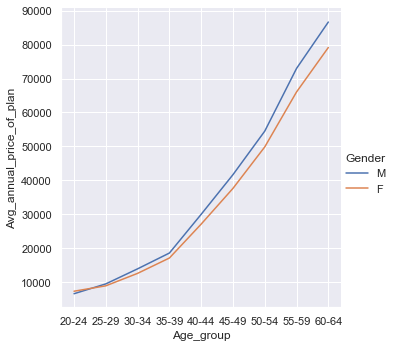

In [21]:
sns.relplot(x="Age_group", y="Avg_annual_price_of_plan", 
            hue='Gender', ci=None, kind="line", data=insurance_results_8col_df);

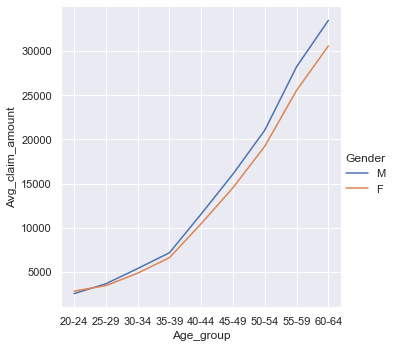

In [22]:
sns.relplot(x="Age_group", y="Avg_claim_amount", 
            hue='Gender', ci=None, kind="line", data=insurance_results_8col_df);

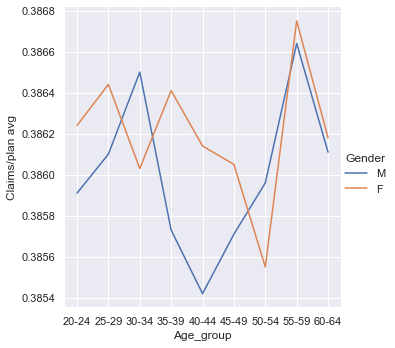

In [23]:
sns.relplot(x="Age_group", y="Claims/plan avg", 
            hue='Gender', ci=None, kind="line", data=insurance_results_8col_df);

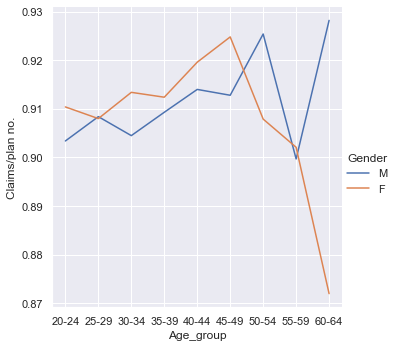

In [24]:
sns.relplot(x="Age_group", y="Claims/plan no.", 
            hue='Gender', ci=None, kind="line", data=insurance_results_8col_df);

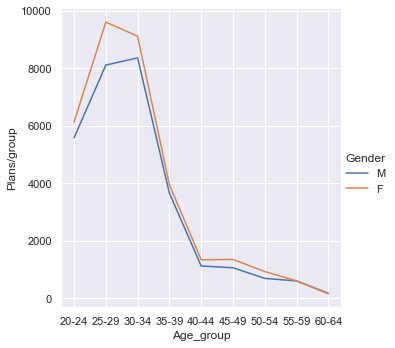

In [25]:
sns.relplot(x="Age_group", y="Plans/group", 
            hue='Gender', ci=None, kind="line", data=insurance_results_8col_df);

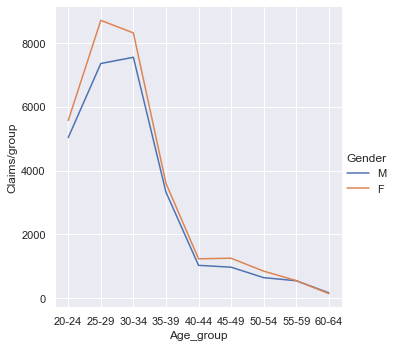

In [26]:
sns.relplot(x="Age_group", y="Claims/group", 
            hue='Gender', ci=None, kind="line", data=insurance_results_8col_df);

In [ ]:
from matplotlib.pyplot import figure
figure(figsize=(8, 6), dpi=80)
fig.set_size_inches(12, 8)
fig.set_dpi(100)

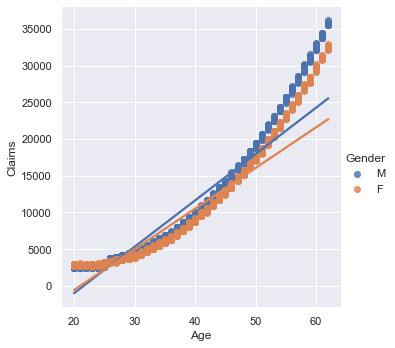

In [20]:
#sns.lmplot(x=x, y=y, hue=hue, data=df, height=10, fit_reg=False, scatter_kws={"s": 5})
sns.set_theme()

# Plot sepal width as a function of sepal_length across days
g = sns.lmplot(
    data=insurance_table_2_df,
    x="Plan_age", y="Claim_amount", hue="Gender")
#g.set_size_inches(12, 8)
#g.set_dpi(100)

# Use more informative axis labels than are provided by default
g.set_axis_labels("Age", "Claims")

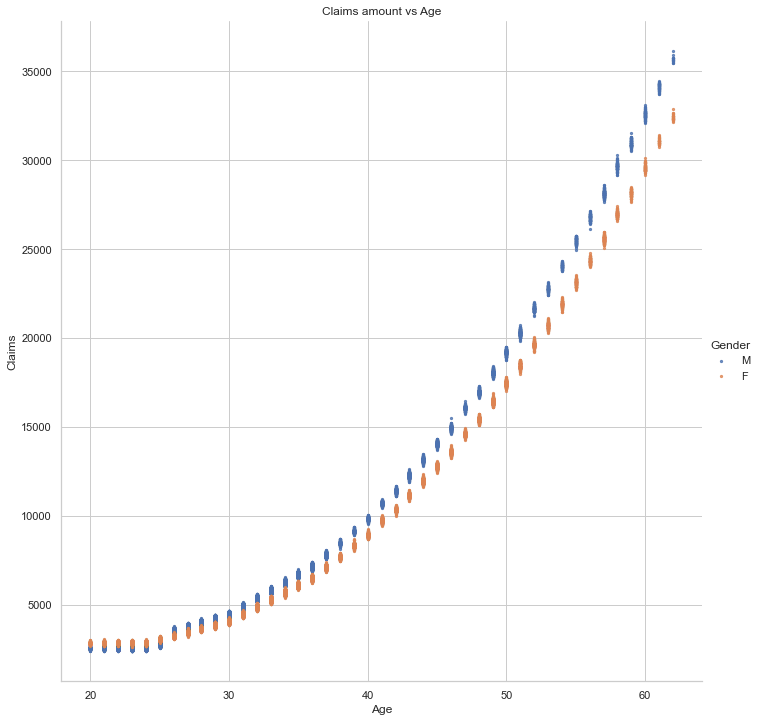

In [19]:
def scatter_plot_df(df, x, y, hue, title, xlabel, ylabel):
    sns.set(style="whitegrid")
    g = sns.lmplot(x=x, y=y, hue=hue, data=df, height=10, fit_reg=False, scatter_kws={"s": 5})
    #g.set_size_inches(12, 8)
    #g.set_dpi(100)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()
    
scatter_plot_df(insurance_table_2_df, 'Plan_age', 'Claim_amount', 'Gender', 'Claims amount vs Age', 'Age', 'Claims')